In [1]:
## Imports for entire notebook
import numpy as np #Array module
import pandas as pd #time series, dataframes, etc
from pylab import plt
from math import *
from numpy import *
import matplotlib.pyplot as plt

The BSM assumption
$S_T = S_0 \exp((r-0.5 \sigma^2)T + \sigma \sqrt{T} z)$

A brief example with python basics, with the following assumptions:
$S_0 = 100$, $\sigma$ from 0% to 50% (per year), $R_f = 0\%$, and expiry (T = 1 year)  



In [2]:
# Code - basic python
S0 = 100
R = 0
sigma = 0.0
T = 1

I = 25 # 50 outcomes on simulation

z = np.random.standard_normal(I)
ST=S0 * exp((R - 0.5*sigma**2)*T + sigma * sqrt(T)*z)

print(ST)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


If we had an option, European Call, K = 110, we can use this simple "monte carlo simulation" to calculate the expected value as:
$C_0$ = exp(-RT) +1/N  $\Sigma$(Payoff)

In [3]:
# with no Volatility, the Call is worthless because K > So
K = 110
Payoff = maximum(ST-K,0)
Call = exp(-R*T) * sum(Payoff)/I
print(f"The value of the Call option is {Call}")

The value of the Call option is 0.0


In [4]:
# Code - basic python
# Volatility is a main driver on option pricing
S0 = 100
R = 0
sigma = 0.5 # 50%
T = 1

I = 25 # 50 outcomes on simulation

z = np.random.standard_normal(I)
ST=S0 * exp((R - 0.5*sigma**2)*T + sigma * sqrt(T)*z)

print(ST)

[147.27489027 134.6880691  103.46452625  42.37345594 172.55943289
  83.38669356  89.3085188   35.91327205 141.48679463  46.47596079
  58.39040094  73.54022345 152.46193158  77.64405336  81.61324477
  88.06081493  82.66393262  94.97895846 128.95777337  76.24212529
 138.89721287  54.02898662  72.55074686  88.48202227 214.89923705]


In [5]:
K = 110
Payoff = maximum(ST-K,0)
Call = exp(-R*T) * sum(Payoff)/I
print(f"The value of the Call option is {Call}")

The value of the Call option is 14.049013670110357


In [6]:
# Lets run a "big" simulation with 10.000 trials
# Numpy is fast!
S0 = 100
R = 0
sigma = 0.5
T = 1
I = 10000 # 50 outcomes on simulation

z = np.random.standard_normal(I)
ST=S0 * exp((R - 0.5*sigma**2)*T + sigma * sqrt(T)*z)

K = 110
Payoff = maximum(ST-K,0)
Call = exp(-R*T) * sum(Payoff)/I
print(f"The value of the Call option is {Call}")

The value of the Call option is 15.7471577527027


In [7]:
def f_bs_call_value(S0, K, T, Rf, sigma): 
    """ 
    pricing function/formula of Call option on a non-dividend paying stock
        Iputs: 
            S0: float, price of underlying at T=0
            K: float, Strike price
            T: float, Time to maturity (in years)
            Rf: float, Risk free rate of return (as given on Risk Neutral / No Arbitrage assumptions)
            sigma: float, Volatility of the underlying asset (per year)
    """
    """
        Output: float, option value
    """
    from math import log, sqrt, exp
    from scipy import stats
    
    d1 = (log(S0/K) + (Rf + 0.5*sigma**2)*T)/(sigma * sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    Nd1 = stats.norm.cdf(d1,0.0,1.0)
    Nd2 = stats.norm.cdf(d2,0.0,1.0)
    
    val = S0*Nd1 - K* exp(-Rf*T)*Nd2
    return val

def f_bs_put_value(S0, K, T, Rf, sigma): 
    """ 
    pricing function/formula of Put option on a non-dividend paying stock
        Iputs: 
            S0: float, price of underlying at T=0
            K: float, Strike price
            T: float, Time to maturity (in years)
            Rf: float, Risk free rate of return (as given on Risk Neutral / No Arbitrage assumptions)
            sigma: float, Volatility of the underlying asset (per year)
    """
    """
        Output: float, option value
    """
    from math import log, sqrt, exp
    from scipy import stats
    
    d1 = (log(S0/K) + (Rf + 0.5*sigma**2)*T)/(sigma * sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    Nd1 = stats.norm.cdf(-d1,0.0,1.0)
    Nd2 = stats.norm.cdf(-d2,0.0,1.0)
    
    val = K* exp(-Rf*T)*Nd2 - S0*Nd1  
    return val    

In [8]:
# nice to compare with the monte carlo with 10,000 trials
call = f_bs_call_value(100,110,1,0,0.5)
put = f_bs_put_value(100,110,1,0,0.5)
print(f"Call value, Closed Form Solution, {call}")
print(f"Put value, Closed Form Solution, {put}")

put_call_parity1 = put - call
put_call_parity2 = 110 - 100 # K*exp(-Rf*T) -S0

print(f"Put-Call Parity: {put_call_parity1} = {put_call_parity2}")


Call value, Closed Form Solution, 16.095681194570233
Put value, Closed Form Solution, 26.095681194570233
Put-Call Parity: 10.0 = 10


In [9]:
def f_bs_vega(S0, K, T, Rf, sigma): 
    """ 
    pricing dCall/dsigma, i.e, vega of Call option on a non-dividend paying stock
        Iputs: 
            S0: float, price of underlying at T=0
            K: float, Strike price
            T: float, Time to maturity (in years)
            Rf: float, Risk free rate of return (as given on Risk Neutral / No Arbitrage assumptions)
            sigma: float, Volatility of the underlying asset (per year)
    """
    """
        Output: float, option value
    """
    from math import log, sqrt, exp
    from scipy import stats
    d1 = (log(S0/K) + (Rf + 0.5*sigma**2)*T)/(sigma * sqrt(T))
    vega = S0 * stats.norm.cdf(d1, 0.0,1.0) * sqrt(T)
    return vega

In [10]:
print(f"Vega value, Closed Form Solution, {f_bs_vega(100,110,1,0,0.5)}")

Vega value, Closed Form Solution, 52.36751354724235


In [11]:
Call1 = f_bs_call_value(100,110,1,0,0.5)
Call2 = f_bs_call_value(100,110,1,0,0.51)
Vega = (Call1-Call2)/(0.5-0.51)
print(Vega)

39.81309047775451


In [12]:
def f_bs_imp_vol(S0, K, T, Rf, Call, sigma_est, iteration=100): 
    """ 
    pricing implied vol from traded options 
        Iputs: 
            S0: float, price of underlying at T=0
            K: float, Strike price
            T: float, Time to maturity (in years)
            Rf: float, Risk free rate of return (as given on Risk Neutral / No Arbitrage assumptions)
            sigma: float, Volatility of the underlying asset (per year)
    """
    """
        Output: float, option value
    """
    from math import log, sqrt, exp
    from scipy import stats
    
    for i in range(iteration):
        if sigma_est <= 0:
            sigma_est = 0
        try:
            sigma_est -= ((f_bs_call_value(S0,K,T,Rf,sigma_est) -Call)/ f_bs_vega(S0,K,T,Rf,sigma_est))
        except:
            sigma_est = 0
    if sigma_est > 0:
        return sigma_est
    else:
        return 0    

def f_bs_imp_vol_put(S0, K, T, Rf, Put, sigma_est, iteration=100): 
    """ 
    pricing implied vol from traded options 
        Iputs: 
            S0: float, price of underlying at T=0
            K: float, Strike price
            T: float, Time to maturity (in years)
            Rf: float, Risk free rate of return (as given on Risk Neutral / No Arbitrage assumptions)
            sigma: float, Volatility of the underlying asset (per year)
    """
    """
        Output: float, option value
    """
    from math import log, sqrt, exp
    from scipy import stats
    
    for i in range(iteration):
        if sigma_est <= 0:
            sigma_est = 0
        try:
            sigma_est -= ((f_bs_put_value(S0,K,T,Rf,sigma_est) -Put)/ f_bs_vega(S0,K,T,Rf,sigma_est))
        except:
            sigma_est = sigma_est
    if sigma_est > 0:
        return sigma_est
    else:
        return 0

In [13]:
f_bs_imp_vol(115.18,98,(7/252),0.02,17.17,0.3,100)

0

In [14]:
imp_vol = f_bs_imp_vol(100,110,1,0,16.095,0.6,100)
print(f"Implied vol for a Call, {imp_vol}")

imp_vol = f_bs_imp_vol_put(100,110,1,0,16.095,0.6,100)
print(f"Implied vol a Put, {imp_vol}")

Implied vol for a Call, 0.49998289486264635
Implied vol a Put, 0.24752657832687225


In [15]:
# real bova option prices as of 8-Fev-2021, where S0 = 115,18
# https://opcoes.net.br/opcoes/bovespa/BOVA11

data = pd.read_csv("c:\documentos\OptionPrices4.csv")

In [16]:
#adjustment for the "floating point in BRL standard"

data["Premio"]/=100
data["Strike"]/=100
data["Vol"]/=10

In [17]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ticker      144 non-null    object 
 1   Vencimento  144 non-null    object 
 2   Dias        144 non-null    int64  
 3   Tipo        144 non-null    object 
 4   Strike      144 non-null    float64
 5   Sit         144 non-null    object 
 6   Premio      144 non-null    float64
 7   Data        144 non-null    object 
 8   Negocios    144 non-null    int64  
 9   Vol         144 non-null    float64
 10  Delta       144 non-null    int64  
 11  Gamma       144 non-null    int64  
 12  Theta       144 non-null    int64  
 13  Vega        144 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 13.0+ KB
None
     Ticker  Vencimento  Dias Tipo  Strike  Sit  Premio        Data  Negocios  \
0  BOVAN780  22/02/2021     7  PUT    60.0  OTM    0.01  05/02/2021         4   
1  BOVAO6

In [18]:
# adding columns to make calculation simple

data["S0"] = 115.18
data["Rf"] = 0.02
data["CalcVol"] = 0.0

# Slicing Calls and Puts to build vol surface
my_calls = data[data["Tipo"] == "CALL"]
my_puts = data[data["Tipo"] == "PUT"]

In [19]:
print(my_calls.info())
print(my_calls.head())
print(my_puts.head())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 15 to 143
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ticker      71 non-null     object 
 1   Vencimento  71 non-null     object 
 2   Dias        71 non-null     int64  
 3   Tipo        71 non-null     object 
 4   Strike      71 non-null     float64
 5   Sit         71 non-null     object 
 6   Premio      71 non-null     float64
 7   Data        71 non-null     object 
 8   Negocios    71 non-null     int64  
 9   Vol         71 non-null     float64
 10  Delta       71 non-null     int64  
 11  Gamma       71 non-null     int64  
 12  Theta       71 non-null     int64  
 13  Vega        71 non-null     int64  
 14  S0          71 non-null     float64
 15  Rf          71 non-null     float64
 16  CalcVol     71 non-null     float64
dtypes: float64(6), int64(6), object(5)
memory usage: 8.6+ KB
None
      Ticker  Vencimento  Dias  Tipo  Strike  Sit

In [20]:
"""
    Calculating implied vols for calls
    Here we will receive a warning, the painful "A value is trying to be set on a copy of a slice from a DataFrame"
    But it is a "false positive alarm"

    PlEASE LEARN THE BEST USE OF PANDAS
"""
for row in my_calls.index:
    S0 =float(my_calls.loc[row]['S0'])
    K = float(my_calls.loc[row]["Strike"])
    T = float(my_calls.loc[row]["Dias"])/252
    Rf = float(my_calls.loc[row]["Rf"])
    Premio = float(my_calls.loc[row]["Premio"])
    calc_vol = f_bs_imp_vol(S0,K,T,Rf,Premio,0.3,100)
    my_calls['CalcVol'].loc[row] =calc_vol*100

c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-20-5c1e8d583efd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_calls['CalcVol'].loc[row] =calc_vol*100


In [21]:
"""
    Here we will receive a warning, the painful "A value is trying to be set on a copy of a slice from a DataFrame"
    But it is a "true positive alarm"

    NOTICED THE DIFERENCE?
"""


#for row in my_calls.iterrows():
#    S0 = (row[1]['S0'])
#    K = float(row[1]["Strike"])
#    T = float(row[1]["Dias"])/252
#    Rf = float(row[1]["Rf"])
#    Premio = float(row[1]["Premio"])
#    calc_vol = f_bs_imp_vol(S0,K,T,Rf,Premio,0.3,100)
#    given_vols.append(float(row[1]["Vol"]))
#    my_calls['CalcVol'].loc[count] =calc_vol
#    count +=1

'\n    Here we will receive a warning, the painful "A value is trying to be set on a copy of a slice from a DataFrame"\n    But it is a "true positive alarm"\n\n    NOTICED THE DIFERENCE?\n'

In [22]:
for row in my_calls.index:
    vol_calc =(my_calls.loc[row]['CalcVol'])
    vol =(my_calls.loc[row]['Vol'])
    print([vol_calc, vol, vol_calc - vol])

[98.74238576179056, 51.1, 47.64238576179056]
[53.57072117189608, 24.2, 29.370721171896083]
[49.68723621130336, 48.0, 1.6872362113033574]
[0.0, 46.5, -46.5]
[57.48878067224202, 44.4, 13.088780672242024]
[66.56231558251336, 39.7, 26.86231558251336]
[37.92949583461892, 34.2, 3.729495834618916]
[35.49721358285705, 34.4, 1.0972135828570515]
[58.978604716680834, 38.0, 20.978604716680834]
[53.38748946733586, 50.5, 2.887489467335861]
[31.72952129100497, 31.5, 0.22952129100497132]
[57.18418935006684, 38.2, 18.984189350066835]
[50.66026600200504, 47.8, 2.8602660020050408]
[43.48621388705636, 42.7, 0.7862138870563555]
[30.89618726867075, 30.7, 0.19618726867075154]
[31.66068053757775, 33.1, -1.439319462422251]
[29.97337166305532, 30.5, -0.5266283369446789]
[30.7841503790882, 29.7, 1.0841503790882001]
[22.983416445426506, 17.6, 5.383416445426505]
[35.142620065870034, 30.6, 4.542620065870032]
[27.91794559989359, 29.8, -1.8820544001064121]
[23.799055876818205, 24.7, -0.9009441231817945]
[31.462406264

In [23]:
"""
    Calculating implied vols for puts
    Here we will receive a warning, the painful "A value is trying to be set on a copy of a slice from a DataFrame"
    But it is a "false positive alarm"

    PlEASE LEARN THE BEST USE OF PANDAS
"""
for row in my_puts.index:
    S0 =float(my_puts.loc[row]['S0'])
    K = float(my_puts.loc[row]["Strike"])
    T = float(my_puts.loc[row]["Dias"])/252
    Rf = float(my_puts.loc[row]["Rf"])
    Premio = float(my_puts.loc[row]["Premio"])
    calc_vol = f_bs_imp_vol_put(S0,K,T,Rf,Premio,0.3,100)
    #given_vols.append(float(row[1]["Vol"]))
    #my_vols.append(calc_vol)
    my_puts['CalcVol'].loc[row] =calc_vol*100

<ipython-input-23-5506f22efe2c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_puts['CalcVol'].loc[row] =calc_vol*100


In [24]:
print(my_puts.head())

     Ticker  Vencimento  Dias Tipo  Strike  Sit  Premio        Data  Negocios  \
0  BOVAN780  22/02/2021     7  PUT    60.0  OTM    0.01  05/02/2021         4   
1  BOVAO610  15/03/2021    22  PUT    60.0  OTM    0.03  08/02/2021       448   
2  BOVAP600  19/04/2021    46  PUT    60.0  OTM    0.11  08/02/2021       246   
3  BOVAN790  22/02/2021     7  PUT    70.0  OTM    0.01  08/02/2021         9   
4  BOVAO700  15/03/2021    22  PUT    70.0  OTM    0.04  08/02/2021      1022   

     Vol  Delta  Gamma  Theta   Vega      S0    Rf    CalcVol  
0  120.0    -13      2    -61    914  115.18  0.02  35.209238  
1   83.1    -32      3    -60   3345  115.18  0.02  38.815219  
2   68.2    -88      7    -85  11873  115.18  0.02  52.061917  
3   98.1    -16      3    -67   1087  115.18  0.02  35.209238  
4   66.8    -51      6    -74   5123  115.18  0.02  41.750731  


In [25]:
for row in my_puts.index:
    vol_calc =(my_puts.loc[row]['CalcVol'])
    vol =(my_puts.loc[row]['Vol'])
    print([vol_calc, vol, vol_calc - vol])

[35.20923771488102, 120.0, -84.79076228511897]
[38.81521878863914, 83.1, -44.28478121136085]
[52.061917245695646, 68.2, -16.138082754304357]
[35.20923771488102, 98.1, -62.890762285118974]
[41.750730997517934, 66.8, -25.049269002482063]
[54.568165267937765, 56.5, -1.931834732062235]
[47.423363250624504, 61.3, -13.876636749375493]
[40.41847359428597, 78.9, -38.481526405714035]
[50.81975945343784, 55.4, -4.580240546562159]
[48.485232547357114, 47.7, 0.7852325473571113]
[45.62412529378476, 69.9, -24.275874706215248]
[45.61242284085053, 65.0, -19.387577159149473]
[55.05742094839646, 62.6, -7.542579051603539]
[46.25052660037771, 45.1, 1.1505266003777095]
[37.93923076226079, 38.3, -0.36076923773920555]
[58.575546743677066, 57.7, 0.875546743677063]
[37.754118940479174, 37.6, 0.1541189404791723]
[56.34263059957294, 52.9, 3.4426305995729436]
[41.26838557002577, 40.3, 0.9683855700257737]
[40.1745599759087, 39.3, 0.8745599759087028]
[53.52056358889297, 50.1, 3.4205635888929677]
[49.215998842122076

<function matplotlib.pyplot.show(close=None, block=None)>

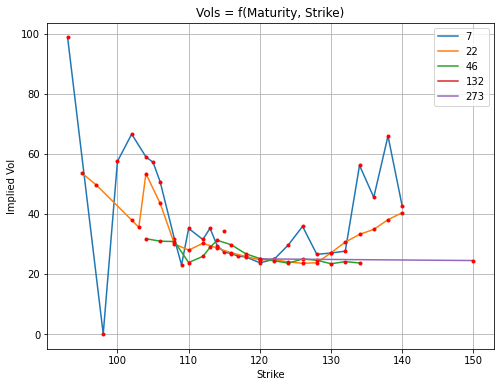

In [26]:
import matplotlib.pyplot as plt

#%matplolib inline
plt.figure(figsize = (8,6))

# Creating Vols = f(Maturity, Strike) for calls and puts
maturities = sorted(set(my_calls['Dias']))
for maturity in maturities:
    calc_vols = my_calls[my_calls['Dias']==maturity]
    plt.plot(calc_vols['Strike'], calc_vols['CalcVol'], label = maturity, lw = 1.5)
    plt.plot(calc_vols['Strike'], calc_vols['CalcVol'], 'r.')
plt.grid(True)
plt.title('Vols = f(Maturity, Strike)')
plt.xlabel('Strike')
plt.ylabel('Implied Vol')
plt.legend(loc=0)
plt.show


  




<function matplotlib.pyplot.show(close=None, block=None)>

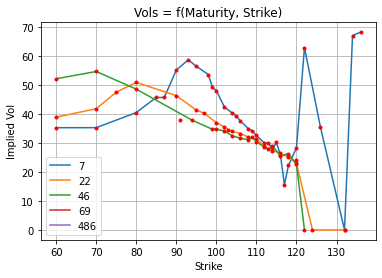

In [27]:
    
# Creating Vols = f(Maturity, Strike) for calls and puts
maturities = sorted(set(my_puts['Dias']))
for maturity in maturities:
    calc_vols = my_puts[my_puts['Dias']==maturity]
    plt.plot(calc_vols['Strike'], calc_vols['CalcVol'], label = maturity, lw = 1.5)
    plt.plot(calc_vols['Strike'], calc_vols['CalcVol'], 'r.')
plt.grid(True)
plt.title('Vols = f(Maturity, Strike)')
plt.xlabel('Strike')
plt.ylabel('Implied Vol')
plt.legend(loc=0)
plt.show

In [28]:
# 3D Vol Surface for Calls
strikes = sorted(set(my_calls['Strike']))
maturities = sorted(set(my_calls['Dias']))
vol_surface = []
vol_line = []
row_count = 0;
col_count = 0;
print(maturities)

[7, 22, 46, 132, 273]


In [29]:
for maturity in maturities:
    for strike in strikes:
        my_temp = my_calls[my_calls['Dias']==maturity]
        my_temp2 = my_temp[my_temp['Strike']==strike]
        if (len(my_temp2)) > 0:
            my_vol =float(my_temp2['CalcVol'])
        else:
            my_vol = 0.0
        vol_line.append(my_vol )
    vol_surface.append(vol_line)
    vol_line = []
   

In [30]:
print(info(vol_surface))
print(info(strikes))
    

Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
None
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
None


In [31]:
strikes, maturities = np.meshgrid(strikes, maturities)


In [32]:
# just a mock
iv = (strikes - 100) ** 2 / (100 * strikes) / maturities

for row in range(len(vol_surface)):
    for col in range(len(vol_surface[0])):
        iv[row,col] = vol_surface[row][col]
        


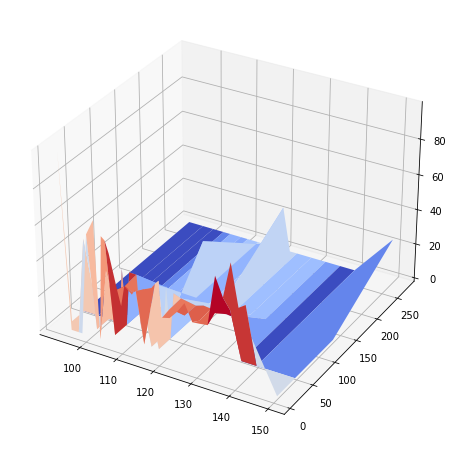

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strikes, maturities, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)

In [34]:
# 3D Vol Surface for Puts

strikes = sorted(set(my_puts['Strike']))
maturities = sorted(set(my_puts['Dias']))
vol_surface = []
vol_line = []
row_count = 0;
col_count = 0;
print(maturities)

[7, 22, 46, 69, 486]


In [35]:
for maturity in maturities:
    for strike in strikes:
        my_temp = my_puts[my_puts['Dias']==maturity]
        my_temp2 = my_temp[my_temp['Strike']==strike]
        if (len(my_temp2)) > 0:
            my_vol =float(my_temp2['CalcVol'])
        else:
            my_vol = 0.0
        vol_line.append(my_vol )
    vol_surface.append(vol_line)
    vol_line = []

In [36]:
strikes, maturities = np.meshgrid(strikes, maturities)


In [37]:
# just a mock
iv = (strikes - 100) ** 2 / (100 * strikes) / maturities

for row in range(len(vol_surface)):
    for col in range(len(vol_surface[0])):
        iv[row,col] = vol_surface[row][col]
        

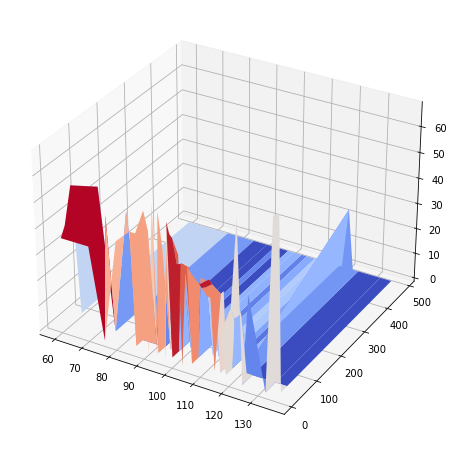

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strikes, maturities, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)

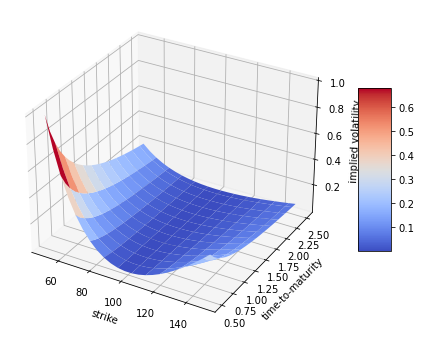

In [39]:
# a nice "theoretical" vol surface
strike = np.linspace(50, 150, 24)
maturity = np.linspace(0.5, 2.5, 24)
strike, maturity = np.meshgrid(strike, maturity)
iv = (strike - 100) ** 2 / (100 * strike) / maturity
# generate fake implied volatilities
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, maturity, iv, rstride=2, cstride=2,
cmap=plt.cm.coolwarm, linewidth=0.5,
antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)

